In [107]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from numbers import Number
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import pickle
import statsmodels.api as sm

In [108]:
# load data 
data = pd.read_csv("data\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

C:\Users\PC\AppData\Local\Temp\ipykernel_12312\256981504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


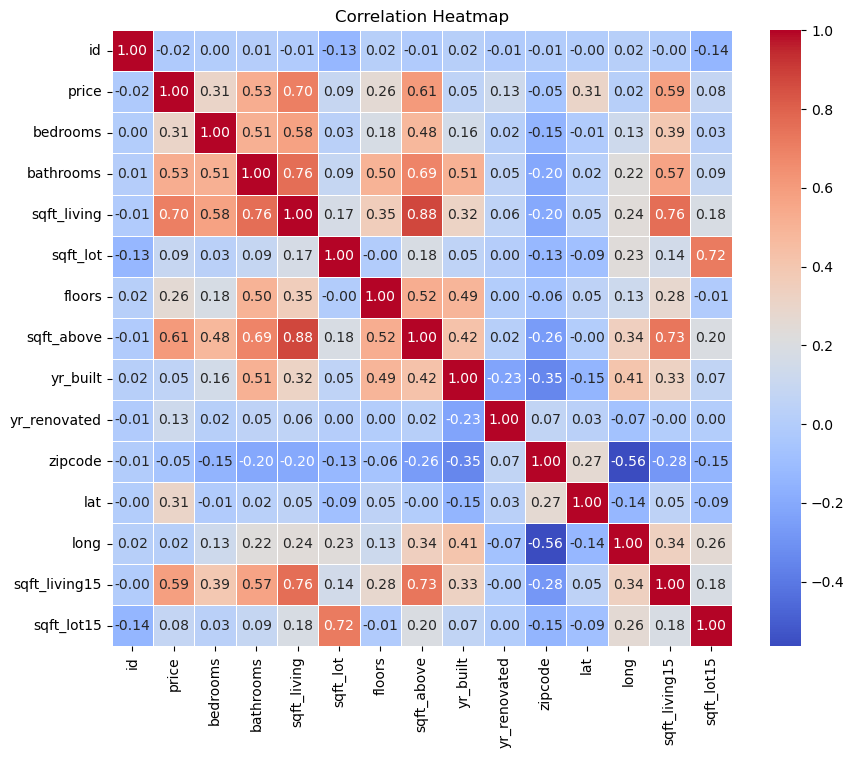

In [112]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [113]:
#Checking for outliers in 'price'
# Calculate Q1 and Q3
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))

# Identify the outliers
outliers = data['price'][(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['price'] = data['price'][~((data['price'] < lower_bound) | (data['price'] > upper_bound))]

price_length = len(data['price'])
print("Length of 'price' column after removing outliers:", price_length)



[1230000.0, 2000000.0, 1350000.0, 1330000.0, 1450000.0, 2250000.0, 1510000.0, 2400000.0, 2900000.0, 1370000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1200000.0, 1150000.0, 1390000.0, 1280000.0, 1200000.0, 1490000.0, 2250000.0, 1600000.0, 2130000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1150000.0, 1480000.0, 1580000.0, 1300000.0, 1310000.0, 2250000.0, 1360000.0, 1220000.0, 2400000.0, 1270000.0, 1200000.0, 1320000.0, 2450000.0, 1240000.0, 1570000.0, 1130000.0, 1200000.0, 1280000.0, 1960000.0, 1750000.0, 5110000.0, 1150000.0, 1880000.0, 1230000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1130000.0, 1180000.0, 1700000.0, 1400000.0, 2540000.0, 1360000.0, 1230000.0, 5350000.0, 1330000.0, 1220000.0, 1250000.0, 1300000.0, 1180000.0, 1380000.0, 1150000.0, 1200000.0, 2250000.0, 1230000.0, 1270000.0, 1680000.0, 1930000.0, 1180000.0, 2350000.0, 1140000.0, 1320000.0, 1430000.0, 1530000.0, 1570000.0, 1130000.0

In [114]:
#Checking for outliers in 'sqft_living'
# Calculate Q1 and Q3
q1 = data['sqft_above'].quantile(0.25)
q3 = data['sqft_above'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['sqft_above'])/(len(data['sqft_above']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['sqft_living'])/(len(data['sqft_above']) + 1)))

# Identify the outliers
outliers = data['sqft_living'][(data['sqft_living'] < lower_bound) | (data['sqft_living'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['sqft_living'] = data['sqft_living'][~((data['sqft_living'] < lower_bound) | (data['sqft_living'] > upper_bound))]

sqft_living_length = len(data['sqft_living'])
print("Length of 'price' column after removing outliers:", sqft_living_length )

[5420, 4770, 4380, 5180, 4410, 5050, 5310, 4550, 4290, 4290, 4800, 6070, 4870, 4860, 4860, 4410, 4760, 6050, 4740, 5403, 4380, 4640, 6050, 4370, 4570, 4670, 4230, 4860, 4270, 4890, 4390, 4250, 5670, 4475, 6070, 4300, 4390, 8010, 4460, 4610, 4380, 4250, 4930, 7390, 4640, 5320, 8000, 6563, 4740, 5450, 4440, 4830, 4280, 4570, 4370, 5710, 5620, 5774, 4470, 4490, 5040, 5770, 5180, 6400, 4490, 6055, 4250, 6300, 4350, 4460, 4340, 4250, 5110, 4700, 4910, 4750, 6840, 4930, 5180, 5130, 6640, 5740, 7350, 4510, 4300, 4870, 5020, 4740, 5370, 4860, 6930, 6550, 6110, 4883, 5010, 4660, 4600, 4910, 4230, 5410, 4270, 4520, 5340, 5230, 5370, 4730, 4430, 5780, 6240, 10040, 4250, 5360, 4610, 7480, 5620, 4340, 7080, 5760, 4400, 4280, 9200, 4320, 4420, 4380, 4580, 5310, 4660, 4300, 4240, 5180, 6810, 4690, 5830, 4930, 5700, 5990, 5070, 4750, 4270, 4750, 5040, 4890, 4350, 4280, 6390, 4570, 4350, 4410, 4430, 4720, 5450, 4470, 6410, 6330, 4250, 4290, 5860, 5990, 4260, 4360, 4370, 4440, 4970, 4940, 7220, 5480, 47

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          20439 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21015 non-null  float64
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

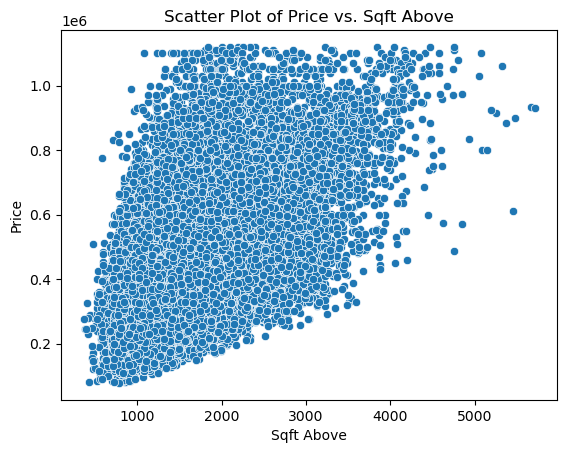

In [154]:
# Checking for

# Create scatter plot
sns.scatterplot(data=data, x='sqft_above', y='price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft Above')
plt.show()

In [145]:

import numpy as np

def find_slope_intercept(X, y):
    """Simple function to get the intercept and slope"""
    # Remove NaN values
    valid_indices = np.logical_and(np.isfinite(X), np.isfinite(y))
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]

    # number of observations
    n = np.size(X_valid)

    # mean of X and y
    x_mean = np.mean(X_valid)
    y_mean = np.mean(y_valid)

    # calculate the cross-deviation
    SS_xy = np.sum(y_valid * X_valid) - (n * y_mean * x_mean)
    # calculating the deviation about X
    SS_xx = np.sum(X_valid * X_valid) - (n * x_mean * x_mean)

    # calculate the regression coefficients 
    slope = SS_xy / SS_xx
    intercept = y_mean - (slope * x_mean)

    return (slope, intercept)

# Call the function with 'sqft_living' as X and 'price' as y
slope, intercept = find_slope_intercept(data["sqft_living"], data["log_price"])
print("Slope:", slope)
print("Intercept:", intercept)



Slope: 0.0003622400526692888
Intercept: 12.26632936387479


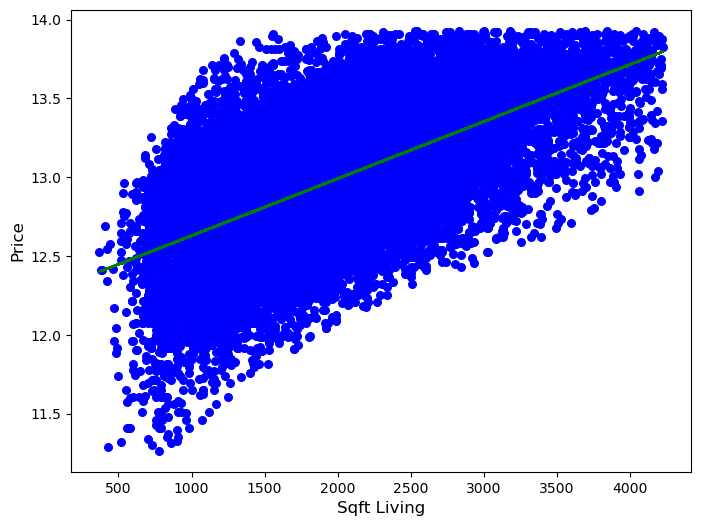

In [146]:


def plot_regression_line(X, y, b):
    """Simple function that draws the regression line"""
    # plot using a scatter plot
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(X, y, color="b", s=30)

    # predict dependent variable 
    y_pred = b[1] + b[0] * X

    # plot regression line
    plt.plot(X, y_pred, color='g')

    # label 
    plt.xlabel("Sqft Living", fontsize=12)
    plt.ylabel("Price", fontsize=12)

    plt.show()

# Call the function with 'sqft_living' as X, 'price' as y, and the slope-intercept values 'b'
b = find_slope_intercept(data["sqft_living"], data["log_price"])
plot_regression_line(data["sqft_living"], data["log_price"], b)


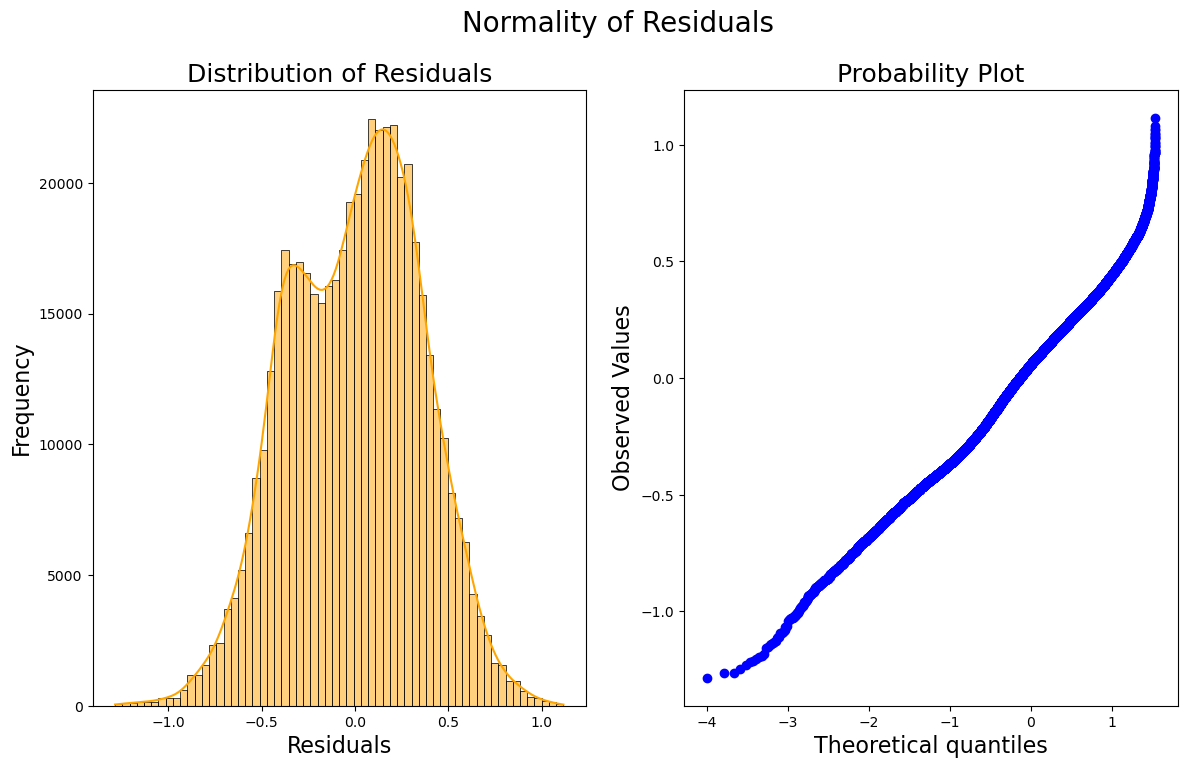

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate the residuals for your linear regression model
residuals = data["log_price"] - (intercept + slope * data["sqft_living"])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Histogram of residuals
sns.histplot(residuals, stat='frequency', color="orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)

# Q-Q plot of residuals
stats.probplot(residuals, plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)
ax[1].set_title("Probability Plot", fontsize=18)

fig.suptitle("Normality of Residuals", fontsize=20)

plt.show()


In [148]:
from scipy import stats

# Remove missing values from residuals
residuals_without_missing = data["residuals"].dropna()

# Perform the Kolmogorov-Smirnov test on residuals without missing values
stat, p = stats.kstest(residuals_without_missing, 'norm')

# Print the test results
print(f"Statistic = {np.round(stat, 3)}, p-value = {np.round(p, 3)}")

# Set the significance level
alpha = 0.05

# Check the p-value against the significance level
if p > alpha:
    print("Fail to reject the null hypothesis and conclude that residuals are normally distributed.")
else:
    print("Reject the null hypothesis and conclude that residuals are not normally distributed.")


Statistic = 0.53, p-value = 0.0
Reject the null hypothesis and conclude that residuals are not normally distributed.


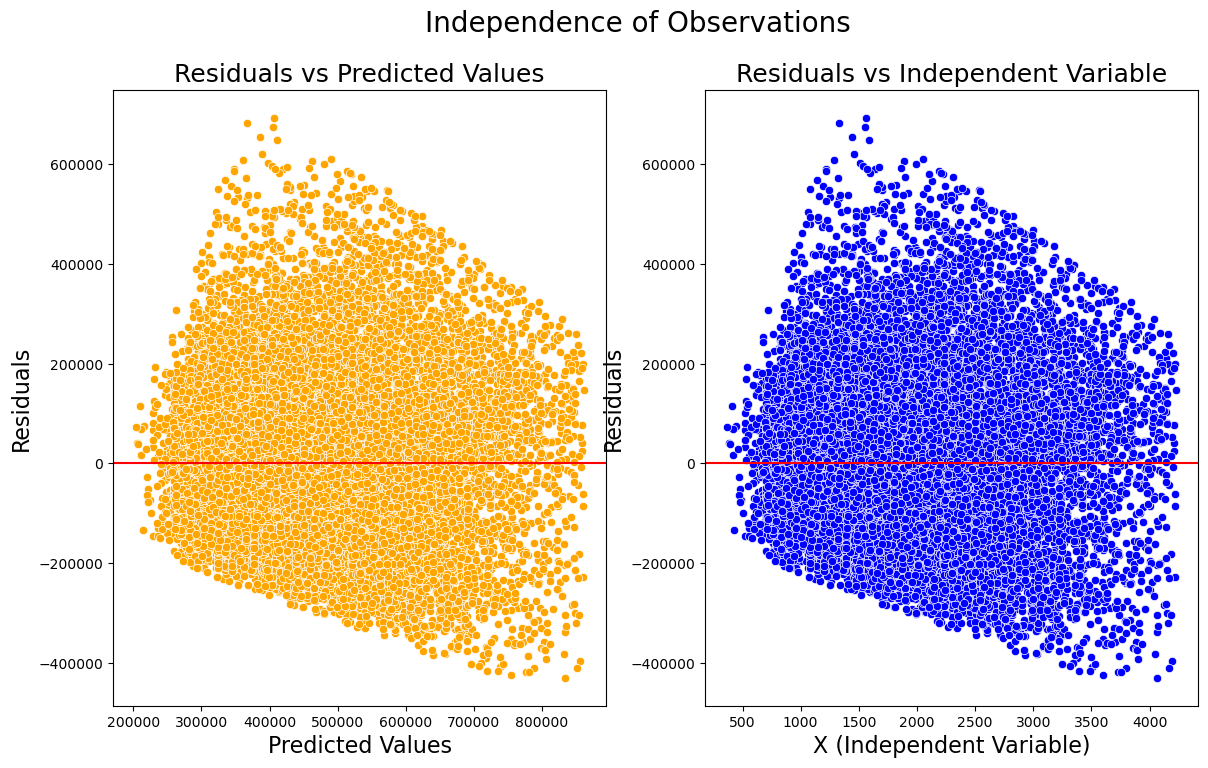

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Residuals vs Predicted Values
sns.scatterplot(x=data["Predicted"], y=data["residuals"], color="orange", ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_ylabel("Residuals", fontsize=16)
ax[0].set_xlabel("Predicted Values", fontsize=16)
ax[0].set_title("Residuals vs Predicted Values", fontsize=18)

# Residuals vs Independent Variable
sns.scatterplot(x=data["sqft_living"], y=data["residuals"], color="blue", ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_ylabel("Residuals", fontsize=16)
ax[1].set_xlabel("X (Independent Variable)", fontsize=16)
ax[1].set_title("Residuals vs Independent Variable", fontsize=18)

fig.suptitle("Independence of Observations", fontsize=20)

plt.show()


In [150]:
# performing durbin-watson test 
durbin_watson_statistic = sm.stats.stattools.durbin_watson(data["residuals"])
print("Durbin-Wason statistic:", durbin_watson_statistic)

Durbin-Wason statistic: nan


In [151]:
import statsmodels.api as sm

# Drop rows with missing values from residuals
residuals_without_missing = data["residuals"].dropna()

# Perform the Durbin-Watson test on residuals without missing values
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals_without_missing)

print("Durbin-Watson statistic:", durbin_watson_statistic)


Durbin-Watson statistic: 1.966167252643694


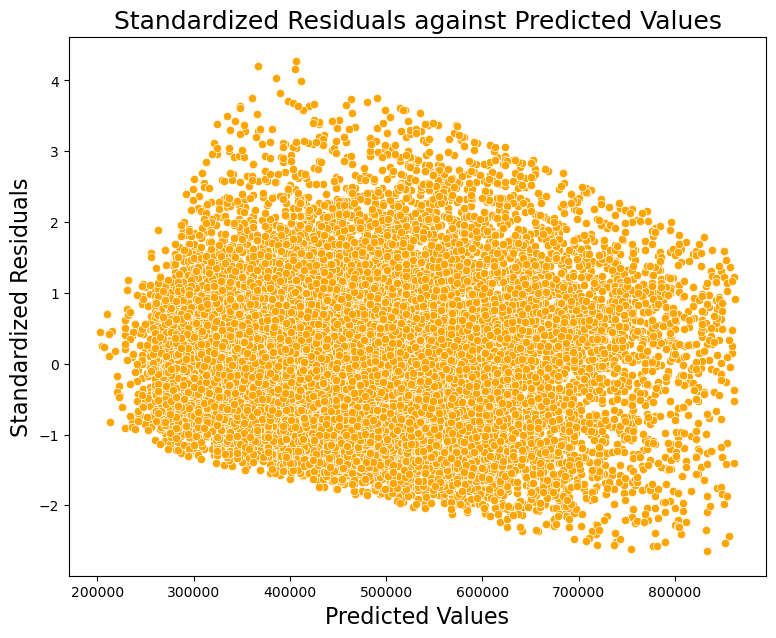

In [153]:
# Calculate the mean and standard deviation of residuals
residuals_mean = np.mean(data["residuals"])
residuals_std = np.std(data["residuals"], ddof=1)  # ddof=1 computes the unbiased sample standard deviation

# Calculate the standardized residuals
data["std_resid"] = data["residuals"] / residuals_std

# Visualize
fig, ax = plt.subplots(figsize=(9, 7))

sns.scatterplot(x=data["Predicted"], y=data["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals against Predicted Values", fontsize=18)

plt.show()
